# Any commercial bank will receive multiple requests for credit cards from various peoples. These people may have different background with respect to their finances. They may have high loan balances, low salary etc. Ideally companies would like to give credit card to those people who would pay bill on time. Manually checking the application for credit card might be tough considering the volume of application. However, the same can be achieved using concepts of Data Science and applying a few algorithms in the dataset.

# Importing all the necessary Libraries

In [42]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")

In [43]:
cc=pd.read_csv('cc_approval.csv')

In [44]:
cc.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus.
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [45]:
cc.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [46]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           690 non-null    object 
 1   Age              690 non-null    object 
 2   Debt             690 non-null    float64
 3   Married          690 non-null    object 
 4   BankCustomer     690 non-null    object 
 5   EducationLevel   690 non-null    object 
 6   Ethnicity        690 non-null    object 
 7   YearsEmployed    690 non-null    float64
 8   PriorDefault     690 non-null    object 
 9   Employed         690 non-null    object 
 10  CreditScore      690 non-null    int64  
 11  DriversLicense   690 non-null    object 
 12  Citizen          690 non-null    object 
 13  ZipCode          690 non-null    object 
 14  Income           690 non-null    int64  
 15  ApprovalStatus.  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


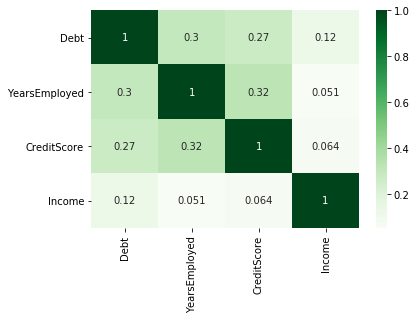

In [47]:
sns.heatmap(cc.corr(), cmap="Greens", annot = True )

In [48]:
cc.shape

(690, 16)

In [49]:
cc.isnull().sum()

Gender             0
Age                0
Debt               0
Married            0
BankCustomer       0
EducationLevel     0
Ethnicity          0
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode            0
Income             0
ApprovalStatus.    0
dtype: int64

In [50]:
cc.isnull()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus.
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [51]:
cc.loc[cc['Age']=='?']

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus.
83,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,300,0,-
86,b,?,0.375,u,g,d,v,0.875,t,f,0,t,s,928,0,-
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,0,0,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,320,0,-
254,b,?,0.625,u,g,k,v,0.250,f,f,0,f,g,380,2010,-
286,a,?,1.500,u,g,ff,ff,0.000,f,t,2,t,g,200,105,-
329,b,?,4.000,y,p,i,v,0.085,f,f,0,t,g,411,0,-
445,a,?,11.250,u,g,ff,ff,0.000,f,f,0,f,g,?,5200,-
450,b,?,3.000,y,p,i,bb,7.000,f,f,0,f,g,0,1,-
500,b,?,4.000,u,g,x,v,5.000,t,t,3,t,g,290,2279,+


In [52]:
cc = cc.replace(['?'],'NaN')

In [53]:
cc.loc[cc['Age']=='NaN']

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus.
83,a,NaN,3.500,u,g,d,v,3.000,t,f,0,t,g,300,0,-
86,b,NaN,0.375,u,g,d,v,0.875,t,f,0,t,s,928,0,-
92,b,NaN,5.000,y,p,aa,v,8.500,t,f,0,f,g,0,0,-
97,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,320,0,-
254,b,NaN,0.625,u,g,k,v,0.250,f,f,0,f,g,380,2010,-
286,a,NaN,1.500,u,g,ff,ff,0.000,f,t,2,t,g,200,105,-
329,b,NaN,4.000,y,p,i,v,0.085,f,f,0,t,g,411,0,-
445,a,NaN,11.250,u,g,ff,ff,0.000,f,f,0,f,g,NaN,5200,-
450,b,NaN,3.000,y,p,i,bb,7.000,f,f,0,f,g,0,1,-
500,b,NaN,4.000,u,g,x,v,5.000,t,t,3,t,g,290,2279,+


In [54]:
cc['Age'].fillna(cc['Age'].mode()[0],inplace=True)

In [55]:
cc['Gender'].fillna(cc['Gender'].mode()[0],inplace=True)

In [56]:
cc['Married'].fillna(cc['Married'].mode()[0],inplace=True)

In [57]:
cc['BankCustomer'].fillna(cc['BankCustomer'].mode()[0],inplace=True)

In [58]:
cc['EducationLevel'].fillna(cc['EducationLevel'].mode()[0],inplace=True)

In [59]:
cc['Ethnicity'].fillna(cc['Ethnicity'].mode()[0],inplace=True)

In [60]:
cc['ZipCode'].fillna(cc['ZipCode'].mode()[0],inplace=True)

In [61]:
cc['Debt'] = cc['Debt'].astype(int)
cc['Age'] = cc['Age'].astype(float)

In [62]:
cc['ApprovalStatus.']=cc['ApprovalStatus.'].apply(lambda row:1 if row =='+' else 0)
cc.tail()
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           690 non-null    object 
 1   Age              678 non-null    float64
 2   Debt             690 non-null    int32  
 3   Married          690 non-null    object 
 4   BankCustomer     690 non-null    object 
 5   EducationLevel   690 non-null    object 
 6   Ethnicity        690 non-null    object 
 7   YearsEmployed    690 non-null    float64
 8   PriorDefault     690 non-null    object 
 9   Employed         690 non-null    object 
 10  CreditScore      690 non-null    int64  
 11  DriversLicense   690 non-null    object 
 12  Citizen          690 non-null    object 
 13  ZipCode          690 non-null    object 
 14  Income           690 non-null    int64  
 15  ApprovalStatus.  690 non-null    int64  
dtypes: float64(2), int32(1), int64(3), object(10)
memory usage: 83

In [63]:
# Removing irrelevant columns and splitting into Train and Test (75 : 25) in a stratified way
from sklearn.model_selection import train_test_split
X = cc.drop(['ZipCode','ApprovalStatus.','DriversLicense'], axis=1)
y = cc['ApprovalStatus.']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify = y)

In [64]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.555126
1    0.444874
Name: ApprovalStatus., dtype: float64
0    0.554913
1    0.445087
Name: ApprovalStatus., dtype: float64


In [65]:
# Separating out numerical and categorical attributes
cat_attr = list(X_train.select_dtypes(include=['category','object']).columns)
num_attr = list(X_train.select_dtypes(include=['number']).columns)

In [66]:
cat_attr

['Gender',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'PriorDefault',
 'Employed',
 'Citizen']

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[num_attr])

X_train_std = pd.DataFrame(scaler.transform(X_train[num_attr]), columns=num_attr)
X_test_std = pd.DataFrame(scaler.transform(X_test[num_attr]), columns=num_attr)

In [68]:
X_train_std.head()

,Age,Debt,YearsEmployed,CreditScore,Income
0,-0.691440,-0.877755,0.080121,0.650462,-0.136581
1,-0.759743,1.270176,-0.562472,-0.490790,-0.196367
2,0.180044,-0.487222,0.043775,-0.490790,-0.161908
3,0.357797,-0.291955,-0.344398,-0.490790,-0.196367
4,-1.383524,0.489110,-0.392374,-0.490790,-0.196367


## imputing the nulls

In [69]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer = imputer.fit(X_train[num_attr])

X_train[num_attr] = imputer.transform(X_train[num_attr])
X_test[num_attr] = imputer.transform(X_test[num_attr])

In [70]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
ohe = OneHotEncoder(handle_unknown='error')

ohe.fit(X_train[cat_attr])

columns_ohe = list(ohe.get_feature_names(cat_attr))
print(columns_ohe)

X_train_cat = ohe.transform(X_train[cat_attr])
X_test_cat = ohe.transform(X_test[cat_attr])

X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)
X_test_cat = pd.DataFrame(X_test_cat.todense(), columns=columns_ohe)

['Gender_NaN', 'Gender_a', 'Gender_b', 'Married_NaN', 'Married_l', 'Married_u', 'Married_y', 'BankCustomer_NaN', 'BankCustomer_g', 'BankCustomer_gg', 'BankCustomer_p', 'EducationLevel_NaN', 'EducationLevel_aa', 'EducationLevel_c', 'EducationLevel_cc', 'EducationLevel_d', 'EducationLevel_e', 'EducationLevel_ff', 'EducationLevel_i', 'EducationLevel_j', 'EducationLevel_k', 'EducationLevel_m', 'EducationLevel_q', 'EducationLevel_r', 'EducationLevel_w', 'EducationLevel_x', 'Ethnicity_NaN', 'Ethnicity_bb', 'Ethnicity_dd', 'Ethnicity_ff', 'Ethnicity_h', 'Ethnicity_j', 'Ethnicity_n', 'Ethnicity_o', 'Ethnicity_v', 'Ethnicity_z', 'PriorDefault_f', 'PriorDefault_t', 'Employed_f', 'Employed_t', 'Citizen_g', 'Citizen_p', 'Citizen_s']


In [71]:
X_train_preprocessed = pd.concat([X_train_std, X_train_cat], axis=1)
X_test_preprocessed = pd.concat([X_test_std, X_test_cat], axis=1)

In [72]:
X_train_preprocessed.isnull().sum()

Age                   7
Debt                  0
YearsEmployed         0
CreditScore           0
Income                0
Gender_NaN            0
Gender_a              0
Gender_b              0
Married_NaN           0
Married_l             0
Married_u             0
Married_y             0
BankCustomer_NaN      0
BankCustomer_g        0
BankCustomer_gg       0
BankCustomer_p        0
EducationLevel_NaN    0
EducationLevel_aa     0
EducationLevel_c      0
EducationLevel_cc     0
EducationLevel_d      0
EducationLevel_e      0
EducationLevel_ff     0
EducationLevel_i      0
EducationLevel_j      0
EducationLevel_k      0
EducationLevel_m      0
EducationLevel_q      0
EducationLevel_r      0
EducationLevel_w      0
EducationLevel_x      0
Ethnicity_NaN         0
Ethnicity_bb          0
Ethnicity_dd          0
Ethnicity_ff          0
Ethnicity_h           0
Ethnicity_j           0
Ethnicity_n           0
Ethnicity_o           0
Ethnicity_v           0
Ethnicity_z           0
PriorDefault_f  

In [73]:
X_train_preprocessed['Age'].fillna(X_train_preprocessed['Age'].mode()[0],inplace=True)
X_test_preprocessed['Age'].fillna(X_test_preprocessed['Age'].mode()[0],inplace=True)

In [74]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

lg.fit(X_train_preprocessed,y_train)

y_train_pred = lg.predict(X_train_preprocessed)
y_test_pred = lg.predict(X_test_preprocessed)


print(y_train_pred)
print(y_test_pred)

[1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1
 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1
 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 1 1 0 1 0 1 1 

In [75]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        96
           1       0.86      0.82      0.84        77

    accuracy                           0.86       173
   macro avg       0.86      0.86      0.86       173
weighted avg       0.86      0.86      0.86       173



In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)

[[86 10]
 [14 63]]


In [77]:
print('F1 Score : ' + str(f1_score(y_test,y_test_pred)))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_test_pred)))

F1 Score : 0.8400000000000001
Accuracy Score : 0.861271676300578


In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)
rf_model.fit(X_train_preprocessed, y_train)

y_train_pred = rf_model.predict(X_test_preprocessed)
y_test_pred = rf_model.predict(X_test_preprocessed)
print(y_train_pred)
print(y_test_pred)

[0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0
 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0
 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0]
[0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0
 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0
 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0]


In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)
print("Classification Report for random: \n", classification_report(y_test, y_test_pred))

[[88  8]
 [17 60]]
Classification Report for random: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88        96
           1       0.88      0.78      0.83        77

    accuracy                           0.86       173
   macro avg       0.86      0.85      0.85       173
weighted avg       0.86      0.86      0.85       173



In [80]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=RandomForestClassifier(oob_score=True),
                         param_grid={'n_estimators': [10,20,30,40,50],'max_depth': [2,3,4,5,7,8,9,10],
                                     'max_features': [2,3,4,5,6,7]})
grid_search.fit(X_train_preprocessed,y_train)
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)